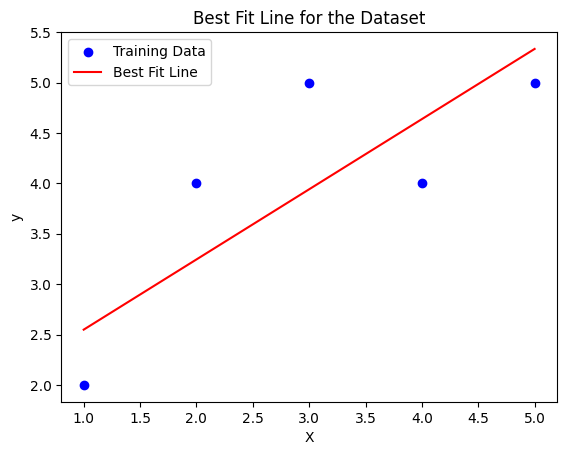

Mean Squared Error (MSE): 0.8112151503410897
R-squared (R2): 0.5075701508296114


In [2]:
import numpy as np
import matplotlib.pyplot as plt
class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.theta = None

    def fit(self, X, y):
        # Add intercept term
        X = np.hstack((np.ones((X.shape[0], 1)), X))

        # Initialize theta
        self.theta = np.zeros(X.shape[1])

        # Perform gradient descent
        for _ in range(self.iterations):
            gradient = (1 / len(y)) * X.T.dot(X.dot(self.theta) - y)
            self.theta -= self.learning_rate * gradient

    def predict(self, X):
        # Add intercept term
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        return X.dot(self.theta)

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def r_squared(y_true, y_pred):
    y_mean = np.mean(y_true)
    SSR = np.sum((y_pred - y_mean) ** 2)
    SST = np.sum((y_true - y_mean) ** 2)
    return SSR / SST

# Example usage
X_train = np.array([[1], [2], [3], [4], [5]])
y_train = np.array([2, 4, 5, 4, 5])
X_test = np.array([[6], [7]])
y_test = np.array([6, 8])

# Create and fit the model
model = LinearRegressionGD()
model.fit(X_train, y_train)
# Predict on the training set
y_pred = model.predict(X_train)

# Plot the dataset and the best fit line
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.plot(X_train, y_pred, color='red', label='Best Fit Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Best Fit Line for the Dataset')
plt.legend()
plt.show()
# Predict on the testing set
y_pred = model.predict(X_test)

# Calculate MSE and R2
mse = mean_squared_error(y_test, y_pred)
r2 = r_squared(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)
